In [11]:
!pip install pandas

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'c:\\users\\user\\miniconda3\\envs\\multi\\lib\\site-packages\\pytz-2021.1.dist-info\\METADATA'



In [10]:
import pandas as pd

df1 = pd.read_csv('./data/서울시 인구현황_구.txt', sep='\t', header=1)
df1

AttributeError: module 'pandas' has no attribute 'read_csv'

In [2]:
df1.iloc[:,[0,1,3,4,5,6,7,8,9,10,11,-1]]
df1.drop(0, inplace=True) # axis=0 생략
df1.head()

,기간,자치구,세대,합계,합계.1,합계.2,한국인,한국인.1,한국인.2,등록외국인,등록외국인.1,등록외국인.2,인구밀도,인구밀도.1,세대당인구,65세이상고령자
1,1991,합계,"3,330,317","10,904,527","5,485,353","5,419,174",…,…,…,…,…,…,"18,014",605.33,3.27,…
2,1991,종로구,"78,169","236,806","119,127","117,679",…,…,…,…,…,…,"9,865",24.01,3.03,…
3,1991,중구,"61,495","184,142","93,312","90,830",…,…,…,…,…,…,"18,438",9.99,2.99,…
4,1991,용산구,"96,696","294,341","147,914","146,427",…,…,…,…,…,…,"13,460",21.87,3.04,…
5,1991,성동구,"244,272","789,014","401,375","387,639",…,…,…,…,…,…,"23,273",33.9,3.23,…


In [3]:
# 열 이름 변경
col_name=['년도', '자치구','총인구','총인구(남)', '총인구(여)', '내국인', '내국인(남)', '내국인(여)',
          '외국인', '외국인(남)','외국인(여)', '65세이상']

for i in range(len(col_name)):
    df1.rename(columns={df1.columns[i]:col_name[i]}, inplace=True)

df1.head(3)

,년도,자치구,총인구,총인구(남),총인구(여),내국인,내국인(남),내국인(여),외국인,외국인(남),외국인(여),65세이상,인구밀도,인구밀도.1,세대당인구,65세이상고령자
1,1991,합계,"3,330,317","10,904,527","5,485,353","5,419,174",…,…,…,…,…,…,"18,014",605.33,3.27,…
2,1991,종로구,"78,169","236,806","119,127","117,679",…,…,…,…,…,…,"9,865",24.01,3.03,…
3,1991,중구,"61,495","184,142","93,312","90,830",…,…,…,…,…,…,"18,438",9.99,2.99,…


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 1 to 768
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   년도        768 non-null    object
 1   자치구       768 non-null    object
 2   총인구       768 non-null    object
 3   총인구(남)    768 non-null    object
 4   총인구(여)    768 non-null    object
 5   내국인       768 non-null    object
 6   내국인(남)    768 non-null    object
 7   내국인(여)    768 non-null    object
 8   외국인       768 non-null    object
 9   외국인(남)    768 non-null    object
 10  외국인(여)    768 non-null    object
 11  65세이상     768 non-null    object
 12  인구밀도      768 non-null    object
 13  인구밀도.1    768 non-null    object
 14  세대당인구     768 non-null    object
 15  65세이상고령자  768 non-null    object
dtypes: object(16)
memory usage: 102.0+ KB


In [5]:
df2=df1.iloc[:, 0:5]
df2.head()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 1 to 768
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   년도      768 non-null    object
 1   자치구     768 non-null    object
 2   총인구     768 non-null    object
 3   총인구(남)  768 non-null    object
 4   총인구(여)  768 non-null    object
dtypes: object(5)
memory usage: 36.0+ KB


In [6]:
# pandas에서 데이터형을 원하는 데이터형으로 변겅: astype() 함수

df2['총인구'] = df2['총인구'].str.replace(',','')
df2['총인구(남)'] = df2['총인구(남)'].str.replace(',','')
df2['총인구(여)'] = df2['총인구(여)'].str.replace(',','')

df2.dtypes

C:\Users\user\miniconda3\envs\multi\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


년도        object
자치구       object
총인구       object
총인구(남)    object
총인구(여)    object
dtype: object

In [7]:
df2 = df2.astype({'년도':int,'총인구':int,'총인구(남)':int,'총인구(여)':int})

df2.dtypes

년도         int32
자치구       object
총인구        int32
총인구(남)     int32
총인구(여)     int32
dtype: object

In [8]:
df2.head()

,년도,자치구,총인구,총인구(남),총인구(여)
1,1991,합계,3330317,10904527,5485353
2,1991,종로구,78169,236806,119127
3,1991,중구,61495,184142,93312
4,1991,용산구,96696,294341,147914
5,1991,성동구,244272,789014,401375


In [9]:
import matplotlib.pyplot as plt

gu = input('조회할 구 이름 입력:')

df3 = df2[df2['자치구']==gu]

조회할 구 이름 입력:강남구


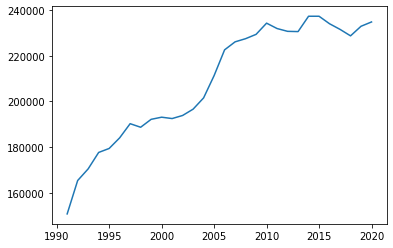

In [10]:
plt.plot(df3['년도'],df3['총인구'])
plt.show()

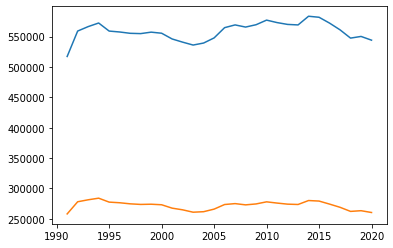

In [11]:
plt.plot(df3['년도'],df3['총인구(남)'])
plt.plot(df3['년도'],df3['총인구(여)'])
plt.show()

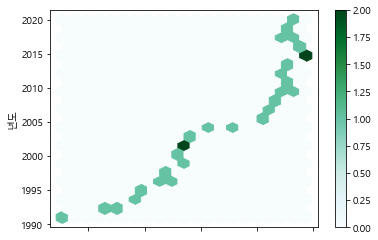

In [12]:
import matplotlib.font_manager as fm
font_name=fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font', family=font_name)

df3.plot(kind='hexbin', x='총인구', y='년도', gridsize=20)  # 산점도 그래프
plt.show()

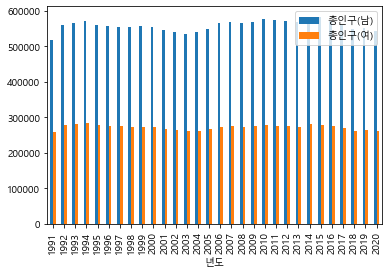

In [13]:
df3.plot(kind='bar', x='년도', y=['총인구(남)', '총인구(여)'])  
plt.show()

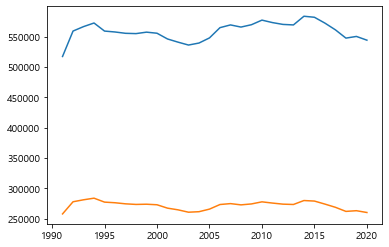

In [14]:
plt.plot(df3['년도'],df3['총인구(남)'])
plt.plot(df3['년도'],df3['총인구(여)'])
plt.show()

In [15]:
df1[df1['내국인'] != '…']

,년도,자치구,총인구,총인구(남),총인구(여),내국인,내국인(남),내국인(여),외국인,외국인(남),외국인(여),65세이상,인구밀도,인구밀도.1,세대당인구,65세이상고령자
1,1991,합계,3330317,10904527,5485353,"5,419,174",…,…,…,…,…,…,"18,014",605.33,3.27,…
2,1991,종로구,78169,236806,119127,"117,679",…,…,…,…,…,…,"9,865",24.01,3.03,…
3,1991,중구,61495,184142,93312,"90,830",…,…,…,…,…,…,"18,438",9.99,2.99,…
4,1991,용산구,96696,294341,147914,"146,427",…,…,…,…,…,…,"13,460",21.87,3.04,…
5,1991,성동구,244272,789014,401375,"387,639",…,…,…,…,…,…,"23,273",33.9,3.23,…
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,2020,관악구,274811,509803,255211,"254,592","495,060","248,339","246,721","14,743","6,872","7,871",-,-,1.8,"78,875"
765,2020,서초구,173502,429025,205282,"223,743","425,126","203,359","221,767","3,899","1,923","1,976",-,-,2.45,"60,169"
766,2020,강남구,234872,544055,260378,"283,677","539,231","257,999","281,232","4,824","2,379","2,445",-,-,2.3,"75,096"
767,2020,송파구,281959,673926,325080,"348,846","667,960","322,299","345,661","5,966","2,781","3,185",-,-,2.37,"93,483"
